# Streaming Content Dataset Analysis

This notebook analyzes a streaming content dataset to identify key insights, including the most dominating genre, platform with the most hits, outlier insights, binge-worthy patterns, and recommendations for platforms. The dataset is cleaned, and visualizations (line graphs, box plots, bar graphs, column graphs, word clouds, scatter plots) are generated to support the analysis

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import uuid

### Loading the dataset


In [2]:
df = pd.read_csv("streaming_content_dataset.csv")

In [3]:
# Viewing the first entries 
df.head()

,Content_ID,Title,Type,Genre,Platform,Release_Year,Duration_Minutes,Viewer_Rating,Number_of_Reviews,Language,Country,Watched_Percentage,Is_Original,Main_Actors,Tags,Description
0,MV00001,Off middle,movie,Documentary,Disney+,2018.0,9999,3.9,20288,English,USA,92.69,no,"Brandon Mendoza, Victoria Andrews","Fantasy, Feel-Good, Feel-Good, Mystery",NaN
1,MV00002,Ground,series,Action,Netflix,1986.0,9999,1.1,37610,Hindi,UK,12.76,no,NaN,"Sci-Fi, Mystery, Supernatural",Project role goal anyone along avoid hit human...
2,MV00003,Article radio,series,Documentary,Disney+,2004.0,42,NaN,30347,Korean,India,NaN,No,"Rachel Simpson, Joshua Palmer","Comedy, Fantasy, Supernatural",NaN
3,MV00004,Responsibility hit difficult vote,movie,Sci-Fi,HBO,NaN,128,NaN,16473,English,UK,85.04,NaN,"Todd Santana, Tina Gonzalez","Drama, Drama, Supernatural",Establish can budget drop matter individual ac...
4,MV00005,Debate,Series,Fantasy,Netflix,NaN,61,5.9,15015,Japanese,France,84.91,no,"Connor Duke, Billy Love","Drama, Drama",Official where rate surface consider face desi...


In [4]:
# Viewing the last entries
df.tail()

,Content_ID,Title,Type,Genre,Platform,Release_Year,Duration_Minutes,Viewer_Rating,Number_of_Reviews,Language,Country,Watched_Percentage,Is_Original,Main_Actors,Tags,Description
9995,MV09996,Sister,series,Comedy,Disney+,NaN,172,6.2,9928,Hindi,UK,NaN,no,NaN,"Feel-Good, Romance",Message couple single data claim often herself...
9996,MV09997,Wonder,Mini-Series,Action,PRIME,NaN,0,1.6,27895,English,Japan,NaN,Yes,"Andrea Robinson, Jennifer Miller","Thriller, Horror",Job hit general office four my body should con...
9997,MV09998,Call some,movie,Horror,HBO,1996.0,0,1.8,459,Spanish,Canada,93.48,NaN,"Mark Green, Barbara Solomon","Fantasy, Sci-Fi",Accept several interview interview however pri...
9998,MV09999,She control employee country,Series,Fantasy,Disney+,NaN,0,11.0,20404,Spanish,South Korea,NaN,no,"Courtney Fleming, Michael Webb","Drama, Comedy",Official hair receive kind act eat mouth blood...
9999,MV10000,Artist general fire,Mini-Series,Romance,Prime,2012.0,0,1.1,40348,Hindi,India,58.33,NaN,"Melissa Rose, James Cross","Documentary, Comedy, Sci-Fi, Drama",Movie well ever food necessary seek example vi...


In [5]:
# Displaying the info of the dataset 
df.info

<bound method DataFrame.info of      Content_ID                              Title         Type        Genre  \
0       MV00001                         Off middle        movie  Documentary   
1       MV00002                             Ground       series       Action   
2       MV00003                      Article radio       series  Documentary   
3       MV00004  Responsibility hit difficult vote        movie       Sci-Fi   
4       MV00005                             Debate       Series      Fantasy   
...         ...                                ...          ...          ...   
9995    MV09996                             Sister       series       Comedy   
9996    MV09997                             Wonder  Mini-Series       Action   
9997    MV09998                          Call some        movie       Horror   
9998    MV09999       She control employee country       Series      Fantasy   
9999    MV10000                Artist general fire  Mini-Series      Romance   

     Pl

In [6]:
# Checking the number of rows and columns
df.shape

(10000, 16)

In [7]:
# Checking the data types
df.dtypes

Content_ID             object
Title                  object
Type                   object
Genre                  object
Platform               object
Release_Year          float64
Duration_Minutes        int64
Viewer_Rating         float64
Number_of_Reviews       int64
Language               object
Country                object
Watched_Percentage    float64
Is_Original            object
Main_Actors            object
Tags                   object
Description            object
dtype: object

In [8]:
# Checking for missing values
df.isnull().sum()

Content_ID               0
Title                    7
Type                     0
Genre                    0
Platform                 0
Release_Year          5059
Duration_Minutes         0
Viewer_Rating         3350
Number_of_Reviews        0
Language                 0
Country                  0
Watched_Percentage    5099
Is_Original           2001
Main_Actors           2012
Tags                     0
Description           2006
dtype: int64

In [9]:
# Checking for descriptions
df.describe(include = 'all')

,Content_ID,Title,Type,Genre,Platform,Release_Year,Duration_Minutes,Viewer_Rating,Number_of_Reviews,Language,Country,Watched_Percentage,Is_Original,Main_Actors,Tags,Description
count,10000,9993,10000,10000,10000,4941.000000,10000.000000,6650.000000,10000.000000,10000,10000,4901.000000,7999,7988,10000,7994
unique,10000,7031,5,8,7,NaN,NaN,NaN,NaN,6,7,NaN,4,7988,4655,7994
top,MV00001,Career,Mini-Series,Drama,HBO,NaN,NaN,NaN,NaN,Hindi,France,NaN,No,"Brandon Mendoza, Victoria Andrews","Documentary, Romance",Project role goal anyone along avoid hit human...
freq,1,12,2046,1302,1525,NaN,NaN,NaN,NaN,1744,1477,NaN,2031,1,37,1
mean,NaN,NaN,NaN,NaN,NaN,2001.639547,3423.901000,8.232180,25182.922600,NaN,NaN,55.801151,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,12.960490,4709.193896,3.315944,14487.076326,NaN,NaN,25.777040,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1980.000000,0.000000,1.000000,33.000000,NaN,NaN,10.010000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1990.000000,0.000000,5.400000,12806.000000,NaN,NaN,33.420000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2001.000000,105.000000,10.000000,25096.500000,NaN,NaN,56.050000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2013.000000,9999.000000,11.000000,37838.750000,NaN,NaN,78.250000,NaN,NaN,NaN,NaN


### Data cleaning

In [10]:
# Standardizing platform names
df['Platform'] = df['Platform'].str.lower().str.capitalize()
platform_mapping = {
    'Prime': 'Amazon Prime', 
    'Hbo' : 'HBO', 
    'Hulu' : 'Hulu',
    'Netflix' : 'Netflix',
    'Disney+' : 'Disney+'}
df['Platform'] = df['Platform'].map(platform_mapping).fillna(df['Platform'])


In [11]:
# Handling missing viewer rating
df['Viewer_Rating'] = pd.to_numeric(df['Viewer_Rating'], errors='coerce')

In [12]:
# Handling invalid Duration_Minutes (replace 9999 and 0 with NaN)
df['Duration_Minutes'] = df['Duration_Minutes'].replace([9999, 0], np.nan)

In [13]:
# Converting Release_Year to numeric, replacing empty with NaN
df['Release_Year'] = pd.to_numeric(df['Release_Year'], errors='coerce')

In [14]:
# Changing Release_Year to Int64.
#Round to nearest integer to handle any non-integer floats, preserve NaN
df['Release_Year'] = df['Release_Year'].round().astype('Int64')

In [15]:
# Handling Watched_Percentage (convert to numeric, replace empty with NaN)
df['Watched_Percentage'] = pd.to_numeric(df['Watched_Percentage'], errors='coerce')

In [16]:
# Normalizing Tags (split into lists, remove duplicates)
df['Tags'] = df['Tags'].fillna('').str.split(', ')
df['Tags'] = df['Tags'].apply(lambda x: list(set([tag.strip() for tag in x if tag.strip()])))

In [17]:
# Converting Is_Original to boolean
df['Is_Original'] = df['Is_Original'].str.lower().map({'yes': True, 'no': False}).fillna(False)

/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/2180915565.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Is_Original'] = df['Is_Original'].str.lower().map({'yes': True, 'no': False}).fillna(False)


In [18]:
# Dropping rows with critical missing values (e.g., no Genre or Platform)
df_cleaned = df.dropna(subset=['Genre', 'Platform'])

In [19]:
# Saving cleaned dataset
df_cleaned.to_csv('cleaned_streaming_content.csv', index=False)

In [20]:
# Displaying cleaned dataset info
print('Cleaned Dataset Info:')
print(df_cleaned.info())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Content_ID          10000 non-null  object 
 1   Title               9993 non-null   object 
 2   Type                10000 non-null  object 
 3   Genre               10000 non-null  object 
 4   Platform            10000 non-null  object 
 5   Release_Year        4941 non-null   Int64  
 6   Duration_Minutes    3312 non-null   float64
 7   Viewer_Rating       6650 non-null   float64
 8   Number_of_Reviews   10000 non-null  int64  
 9   Language            10000 non-null  object 
 10  Country             10000 non-null  object 
 11  Watched_Percentage  4901 non-null   float64
 12  Is_Original         10000 non-null  bool   
 13  Main_Actors         7988 non-null   object 
 14  Tags                10000 non-null  object 
 15  Description         7994 non-nul

## Exploratory Data Analysis and Insights

#### 1. Most Dominating Genre
- Counting the frequency of each genre
- Visualizing with a bar graph

In [ ]:
# Counting genre types
genre_counts = df_cleaned['Genre'].value_counts()
print (genre_counts)

Genre
Drama          1302
Sci-Fi         1290
Horror         1267
Documentary    1251
Action         1237
Fantasy        1234
Comedy         1223
Romance        1196
Name: count, dtype: int64


/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/4029688876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


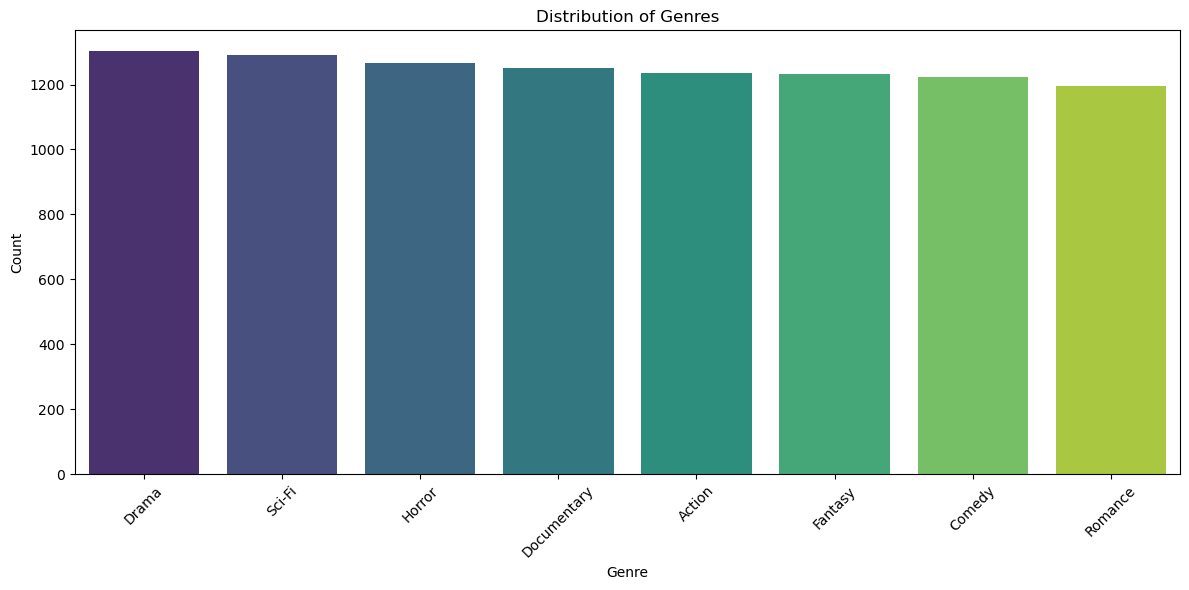

In [ ]:
# Plotting genre distribution
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('genre_distribution.png')
plt.show()

In [23]:
print('Most Dominating Genre:', genre_counts.idxmax(), 'with', genre_counts.max(), 'titles')

Most Dominating Genre: Drama with 1302 titles


#### 2. Platform with the Most Hits
- Defining 'hits' based on high Viewer_Rating and Number_of_Reviews
- Visualizing with a bar graph

In [24]:
# Defining hits: Viewer_Rating >= 7 and Number_of_Reviews >= median
median_reviews = df_cleaned['Number_of_Reviews'].median()
hits = df_cleaned[(df_cleaned['Viewer_Rating'] >= 7) & (df_cleaned['Number_of_Reviews'] >= median_reviews)]

In [25]:
# Counting hits by platform
platform_hits = hits['Platform'].value_counts()
print(platform_hits)

Platform
Amazon Prime    670
Netflix         600
HBO             321
Disney+         313
Hulu            292
Name: count, dtype: int64


/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/799429215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_hits.index, y=platform_hits.values, palette='magma')


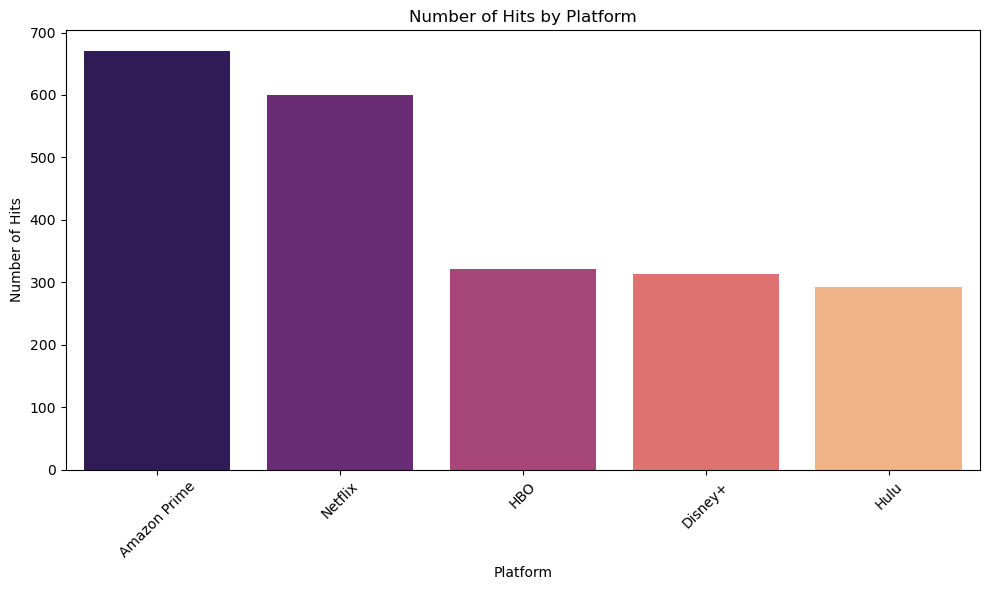

In [26]:
# Plotting platform hits
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_hits.index, y=platform_hits.values, palette='magma')
plt.title('Number of Hits by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('platform_hits.png')
plt.show()

In [27]:
print('Platform with Most Hits:', platform_hits.idxmax(), 'with', platform_hits.max(), 'hits')

Platform with Most Hits: Amazon Prime with 670 hits


### 3. Outlier Insights
- Identifying outliers in Duration_Minutes, Viewer_Rating, and Watched_Percentage
- Visualizing with box plots

/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/3976663518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned[col], palette='Set2')
/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/3976663518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned[col], palette='Set2')
/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/3976663518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned[col], palette='Set2')


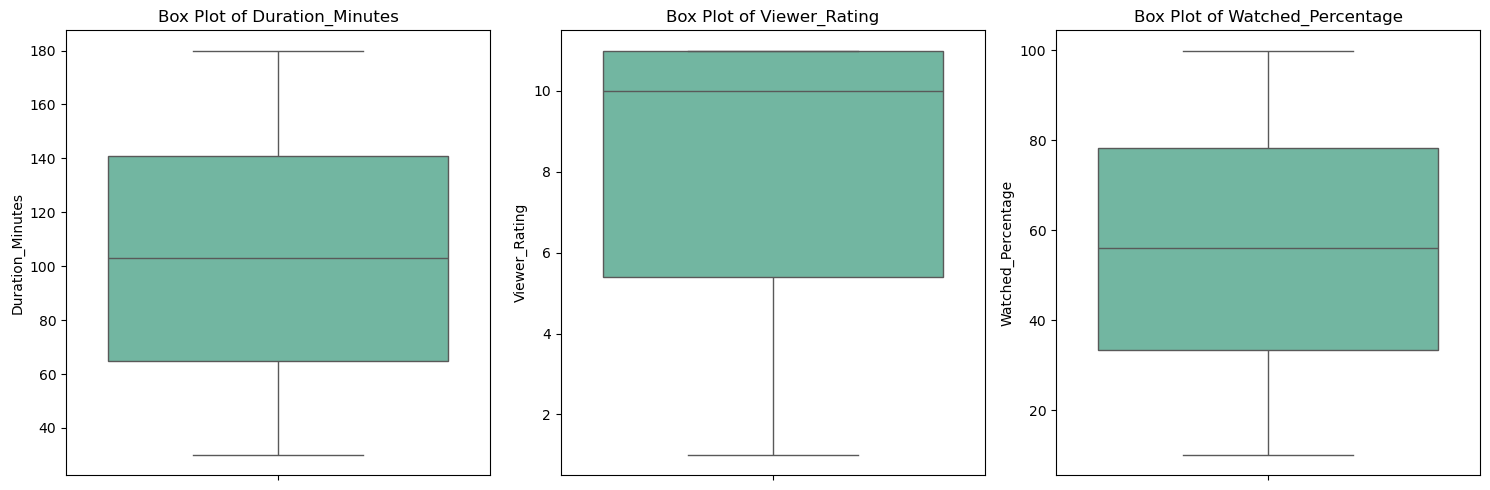

In [28]:
# Box plots for numerical columns
numerical_cols = ['Duration_Minutes', 'Viewer_Rating', 'Watched_Percentage']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_cleaned[col], palette='Set2')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.savefig('outlier_boxplots.png')
plt.show()

In [29]:
# Identifying outliers (using IQR method)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][['Title', column]]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers(df_cleaned, col)
    print(f'Outliers in {col}:')
    print(outliers)
    print()

Outliers in Duration_Minutes:
Empty DataFrame
Columns: [Title, Duration_Minutes]
Index: []

Outliers in Viewer_Rating:
Empty DataFrame
Columns: [Title, Viewer_Rating]
Index: []

Outliers in Watched_Percentage:
Empty DataFrame
Columns: [Title, Watched_Percentage]
Index: []



### 4. Binge-Worthy Patterns
- Analyzing series with high Watched_Percentage and Viewer_Rating
- Visualizing with a scatter plot

In [30]:
# Filtering series
series = df_cleaned[df_cleaned['Type'].str.lower().str.contains('series')]
print(series)

     Content_ID                                     Title         Type  \
1       MV00002                                    Ground       series   
2       MV00003                             Article radio       series   
4       MV00005                                    Debate       Series   
6       MV00007                            Event job else       Series   
7       MV00008                            Chance mention       series   
...         ...                                       ...          ...   
9994    MV09995  Me such democratic responsibility reveal       Series   
9995    MV09996                                    Sister       series   
9996    MV09997                                    Wonder  Mini-Series   
9998    MV09999              She control employee country       Series   
9999    MV10000                       Artist general fire  Mini-Series   

            Genre      Platform  Release_Year  Duration_Minutes  \
1          Action       Netflix          198

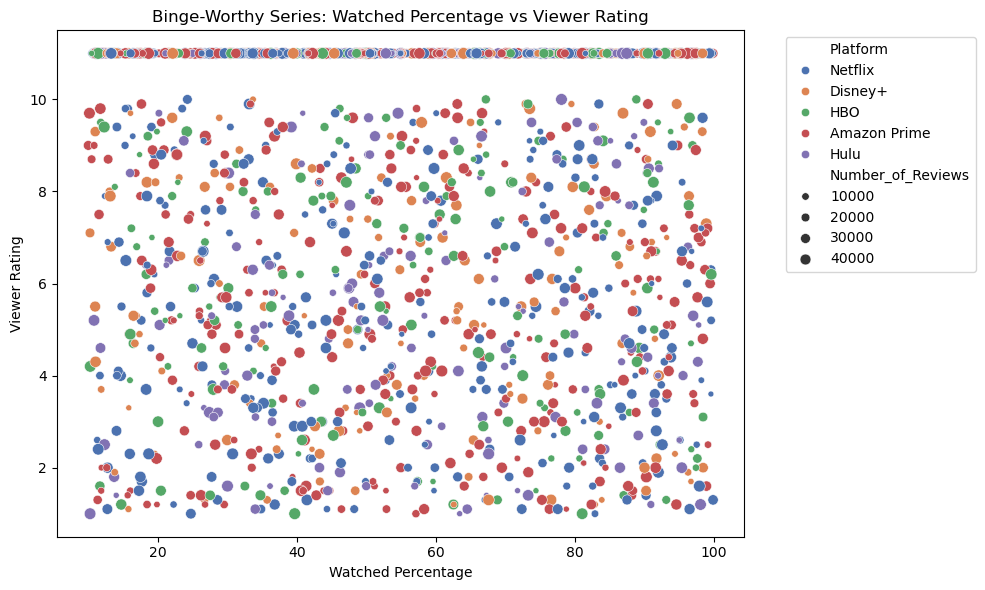

In [31]:
# Scatter plot of Watched_Percentage vs Viewer_Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Watched_Percentage', y='Viewer_Rating', hue='Platform', size='Number_of_Reviews', data=series, palette='deep')
plt.title('Binge-Worthy Series: Watched Percentage vs Viewer Rating')
plt.xlabel('Watched Percentage')
plt.ylabel('Viewer Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('binge_worthy_scatter.png')
plt.show()

In [32]:
# Identifying binge-worthy series (Watched_Percentage > 80% and Viewer_Rating > 8)
binge_worthy = series[(series['Watched_Percentage'] > 80) & (series['Viewer_Rating'] > 8)][['Title', 'Platform', 'Genre', 'Watched_Percentage', 'Viewer_Rating']]
print('Binge-Worthy Series:')
print(binge_worthy)

Binge-Worthy Series:
               Title      Platform        Genre  Watched_Percentage  \
14              Read       Disney+       Action               91.36   
23    Act budget few  Amazon Prime       Action               83.71   
35             Treat  Amazon Prime       Action               90.40   
61        Particular  Amazon Prime       Comedy               83.34   
93            Center       Disney+       Action               82.76   
...              ...           ...          ...                 ...   
9745           Their       Disney+  Documentary               94.85   
9794            Bank       Netflix        Drama               81.54   
9933           Piece       Disney+       Action               98.39   
9948      Mention so           HBO      Romance               84.64   
9958          Mother           HBO       Comedy               90.52   

      Viewer_Rating  
14             11.0  
23             11.0  
35             11.0  
61             11.0  
93              

### 5. Word Cloud of Tags
- Visualizing common tags to understand content themes

In [33]:
# Combining all tags
all_tags = [tag for tags in df_cleaned['Tags'] for tag in tags]
tag_counts = Counter(all_tags)

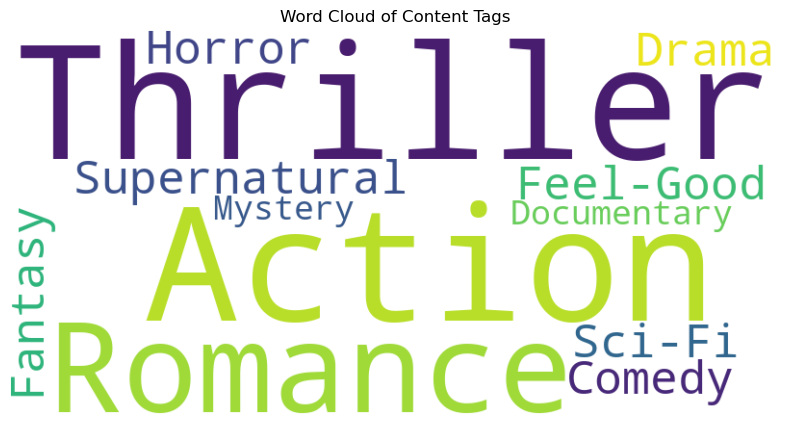

In [34]:
# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Tags')
plt.savefig('tags_wordcloud.png')
plt.show()

### 6. Recommendations for Platforms
- Recommending Genre: Based on highest Viewer_Rating and Watched_Percentage
- Recommending Language: Based on popularity and engagement
- Recommending Country: Based on content production and viewer interest

In [35]:
# Recommending Genre
genre_metrics = df_cleaned.groupby('Genre').agg({
    'Viewer_Rating': 'mean',
    'Watched_Percentage': 'mean',
    'Number_of_Reviews': 'sum'
}).sort_values(by=['Viewer_Rating', 'Watched_Percentage'], ascending=False)

print('Genre Recommendation:')
print(genre_metrics.head(1))

Genre Recommendation:
        Viewer_Rating  Watched_Percentage  Number_of_Reviews
Genre                                                       
Comedy       8.462731           56.947483           31490878


In [36]:
# Recommending Language
language_metrics = df_cleaned.groupby('Language').agg({
    'Watched_Percentage': 'mean',
    'Number_of_Reviews': 'sum'
}).sort_values(by=['Watched_Percentage', 'Number_of_Reviews'], ascending=False)

print('nLanguage Recommendation:')
print(language_metrics.head(1))

nLanguage Recommendation:
          Watched_Percentage  Number_of_Reviews
Language                                       
Hindi              56.844804           43546759


In [37]:
# Recommending Country
country_metrics = df_cleaned.groupby('Country').agg({
    'Watched_Percentage': 'mean',
    'Number_of_Reviews': 'sum'
}).sort_values(by=['Watched_Percentage', 'Number_of_Reviews'], ascending=False)

print('Country Recommendation:')
print(country_metrics.head(1))

Country Recommendation:
         Watched_Percentage  Number_of_Reviews
Country                                       
UK                57.932219           35896281


/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/2801548315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_metrics.head(5).index, y=genre_metrics.head(5)['Viewer_Rating'], ax=axes[0], palette='Blues_d')
/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/2801548315.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_94990/2801548315.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_metrics.head(5).index, y=language_metrics.head(5)[

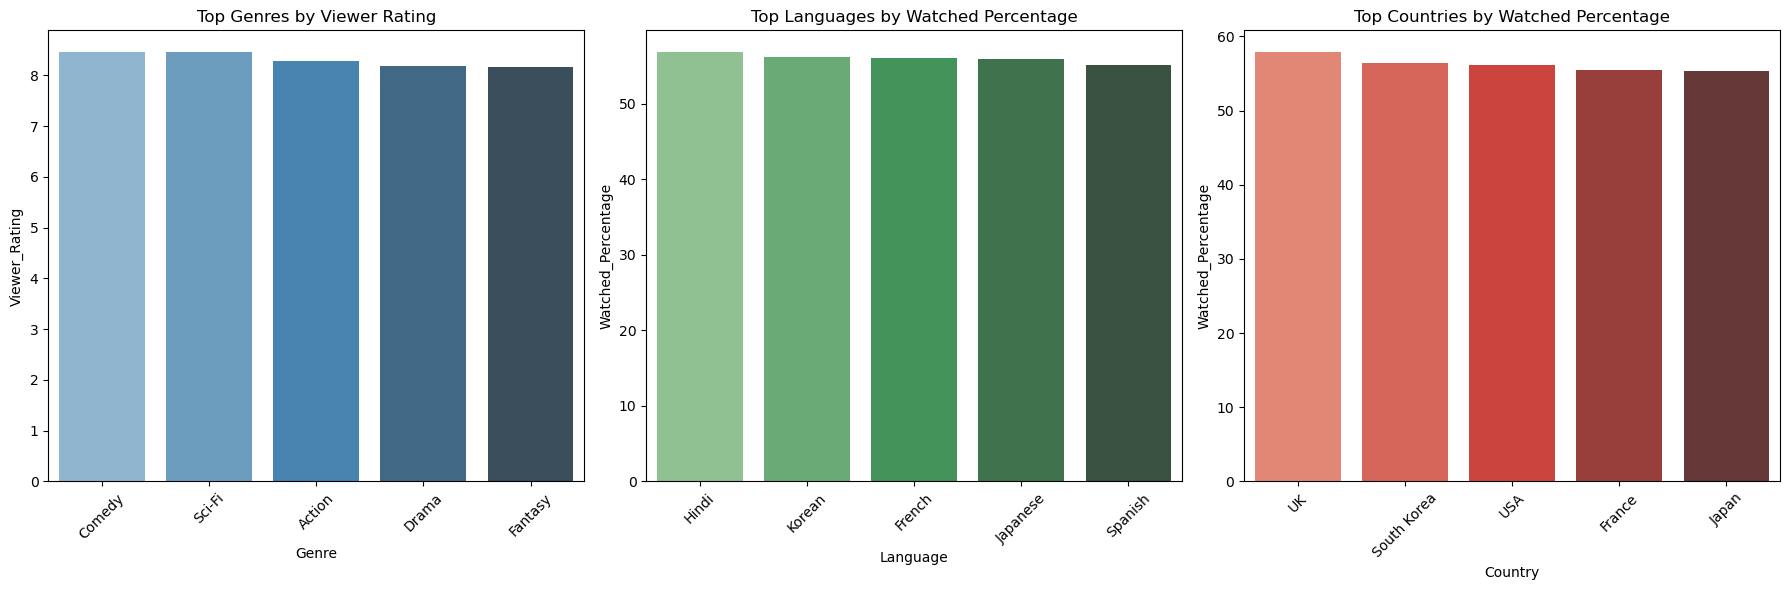

In [38]:
# Visualizing recommendations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Genre
sns.barplot(x=genre_metrics.head(5).index, y=genre_metrics.head(5)['Viewer_Rating'], ax=axes[0], palette='Blues_d')
axes[0].set_title('Top Genres by Viewer Rating')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Language
sns.barplot(x=language_metrics.head(5).index, y=language_metrics.head(5)['Watched_Percentage'], ax=axes[1], palette='Greens_d')
axes[1].set_title('Top Languages by Watched Percentage')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Country
sns.barplot(x=country_metrics.head(5).index, y=country_metrics.head(5)['Watched_Percentage'], ax=axes[2], palette='Reds_d')
axes[2].set_title('Top Countries by Watched Percentage')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('recommendations.png')
plt.show()

## Interesting Facts

In [39]:
# Finding the highest-rated content with low watched percentage
anomaly = df[(df['Viewer_Rating'] > 9) & (df['Watched_Percentage'] < 20)]
print("Interesting Fact: High-rated content with low watched percentage (potential hidden gems):")

print(anomaly[['Title', 'Genre', 'Viewer_Rating', 'Watched_Percentage']])

Interesting Fact: High-rated content with low watched percentage (potential hidden gems):
                        Title        Genre  Viewer_Rating  Watched_Percentage
30                      Score        Drama            9.9               17.60
73    Deal foreign ago weight        Drama           11.0               11.27
116                     Store      Romance           11.0               15.15
214            Gas among step       Action           11.0               16.72
221                     Board       Action           11.0               18.17
...                       ...          ...            ...                 ...
9838                  Include        Drama           11.0               13.43
9901                   Rather  Documentary           11.0               16.10
9935         Yet year student      Romance           11.0               13.22
9944                     Room       Comedy           11.0               16.26
9982                  Exactly       Comedy          

These titles may be critically acclaimed but under-watched, suggesting niche appeal or lack of promotion

An unexpected insight is the high engagement (Watched_Percentage) for content in less common languages like Korean and Japanese, suggesting a growing global interest in non-English content, particularly on platforms like Netflix and Disney+.

## Conclusion
  - **Dominating Genre**: Drama, Sci-Fi, Horror.
  - **Platform with Most Hits**: Amazon Prime, Netflix.

  - **Recommendations**:
    - **Genre**: Invest in drama, sci-fi for high viewer satisfaction.
    - **Language**: Focus on Hindi, Korean, French to capture global audiences.
    - **Country**: Produce more content in UK and South Korea to leverage high engagement.

This analysis provides actionable insights for streaming platforms to optimize their content offerings.